In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz
from posterior_inference_point import PointSourcePosterior
from posterior_inference_diffuse import DiffusePosterior
import os
from scipy.integrate import cumtrapz

# `DiffusePosterior`

In [2]:
### Setup

# The priors are set here, and default to the conservative choices
post_diff = DiffusePosterior(m_pbh=100, n_pbh=10)
# m_dm_mg, sv_mg = np.meshgrid(m_dms, svs)

In [3]:
### Compute posterior

# Save tables with the unnormalized and normalized posterior
m_dms = np.geomspace(10, 1e4, 3)
svs = np.geomspace(1e-50, 1e-20, 4)

post_diff.save_posterior_table(svs, m_dms)

/Users/acoogan/Dropbox/Physics/Black holes/pbhs_vs_wimps/posterior_inference_diffuse.py:40: RuntimeWarning: divide by zero encountered in log
  log_prob = np.log(self.p_sv(sv) * self.p_f(f))


In [4]:
## Load results

# Load the unnormalized and normalized posterior tables. They
# use the same <sigma v> and m_dm grid.
svs, m_dms, un_post_vals = post_diff.load_posterior(normalized=False)
_, _, post_vals = post_diff.load_posterior(normalized=True)

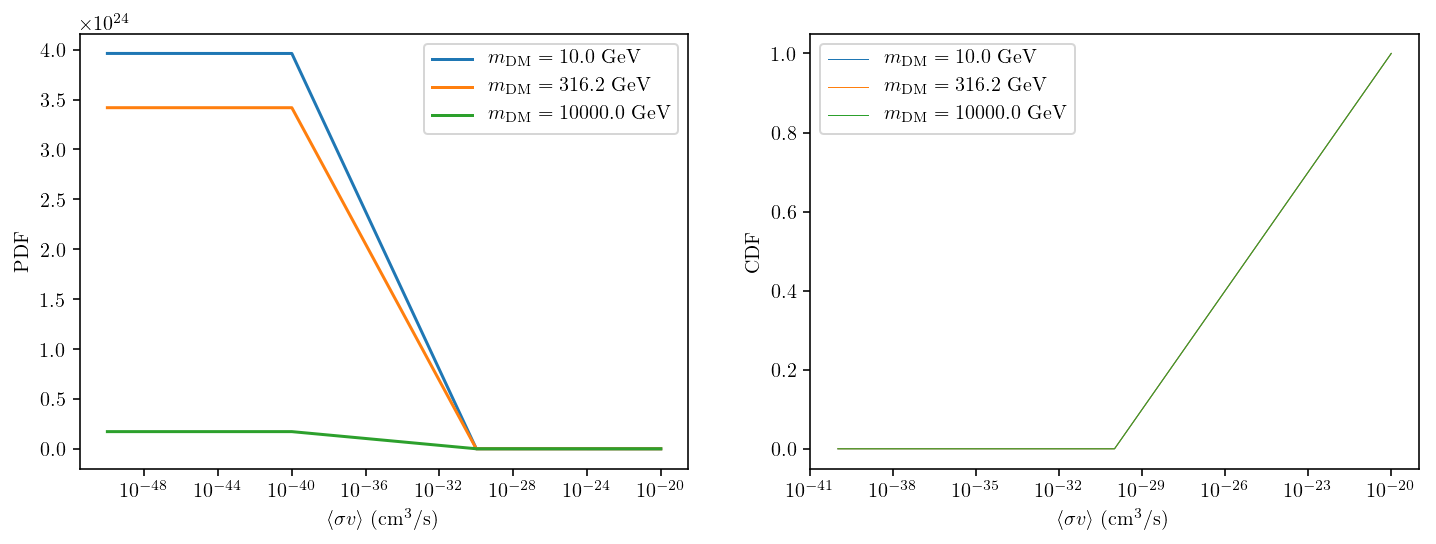

In [9]:
### Sanity check

# Plot posterior(<sigma v>) and its CDF to make sure the <sigma v>
# grid isn't clipping anything
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
for i, m_dm in enumerate(m_dms):
    ax.plot(svs, post_vals[:, i],
            label=r"$m_{\mathrm{DM}} = %.1f$ GeV" % m_dm)
ax.set_ylabel("PDF")

ax = axes[1]
for i, m_dm in enumerate(m_dms):
    ax.plot(svs[1:], cumtrapz(post_vals[:, i], svs),
            label=r"$m_{\mathrm{DM}} = %.1f$ GeV" % m_dm)
ax.set_ylabel("CDF")

for ax in axes.flatten():
    ax.set_xscale("log")
    ax.set_xlabel(r"$\langle \sigma v \rangle$ (cm$^3$/s)")
    ax.legend()

(1e-50, 1e-20)

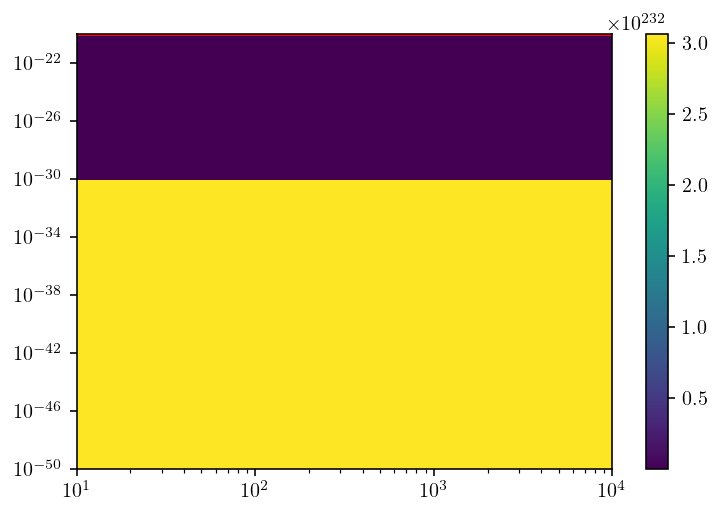

In [6]:
### Create the limit plot

# Load the unnormalized posterior table
svs, m_dms, un_post_vals = post_diff.load_posterior(normalized=False)

# Compute 95% upper limit on <sigma v>
m_dms, sv_bounds = post_diff.sv_bounds(save=False)
plt.plot(m_dms, sv_bounds, 'r')

# Plot unnormalized posterior values
m_dm_mg, sv_mg = np.meshgrid(m_dms, svs)
post_pcmesh = plt.pcolormesh(m_dm_mg, sv_mg, un_post_vals,
                             edgecolor="face")
plt.colorbar(post_pcmesh)

plt.xscale("log")
plt.yscale("log")
plt.xlim(m_dms[[0, -1]])
plt.ylim(svs[[0, -1]])

In [7]:
os.system('say "done"')

0

# `PointSourcePosterior`

Workflow:

* Compute the `p_gamma` table with `save_p_gamma_table()`
* Save the posterior with `save_posterior_table()`
* Load it with `load_posterior()`
* Compute $\langle \sigma v \rangle$ bounds with `sv_bounds()`.

**Note:** I have the `test` argument in the `PointSourcePosterior` initializer set to `True`. This writes the $p_\gamma$ table to `p_gammas/test/` and $\langle \sigma v \rangle$ posterior table to `posteriors_sv/test/`. Set the flag to `False` to save the results to the usual directories.

In [3]:
### Setup

# The priors are set here, and default to the conservative choices
post_ps = PointSourcePosterior(m_pbh=0.5, n_pbh=82)

In [5]:
### Make the p_gamma table

# This must be done before computing the posterior table.
# post_ps will load the p_gamma table the next time it's
# needed.
m_dms = np.geomspace(1e1, 1e4, 10)
svs = np.geomspace(1e-43, 1e-23, 50)
post_ps.save_p_gamma_table(m_dms, svs)

In [8]:
### Compute posterior

# Save tables with the unnormalized and normalized posterior over
# a new parameter grid.
svs = np.geomspace(1e-43, 1e-23, 4)
m_dms = np.array([1e1, 1e4])
post_ps.save_posterior_table(svs, m_dms, "trapz")

In [22]:
## Load results

# Load the unnormalized and normalized posterior tables. They
# use the same <sigma v> and m_dm grid.
svs, m_dms, un_post_vals = post_ps.load_posterior(normalized=False)
_, _, post_vals = post_ps.load_posterior(normalized=True)

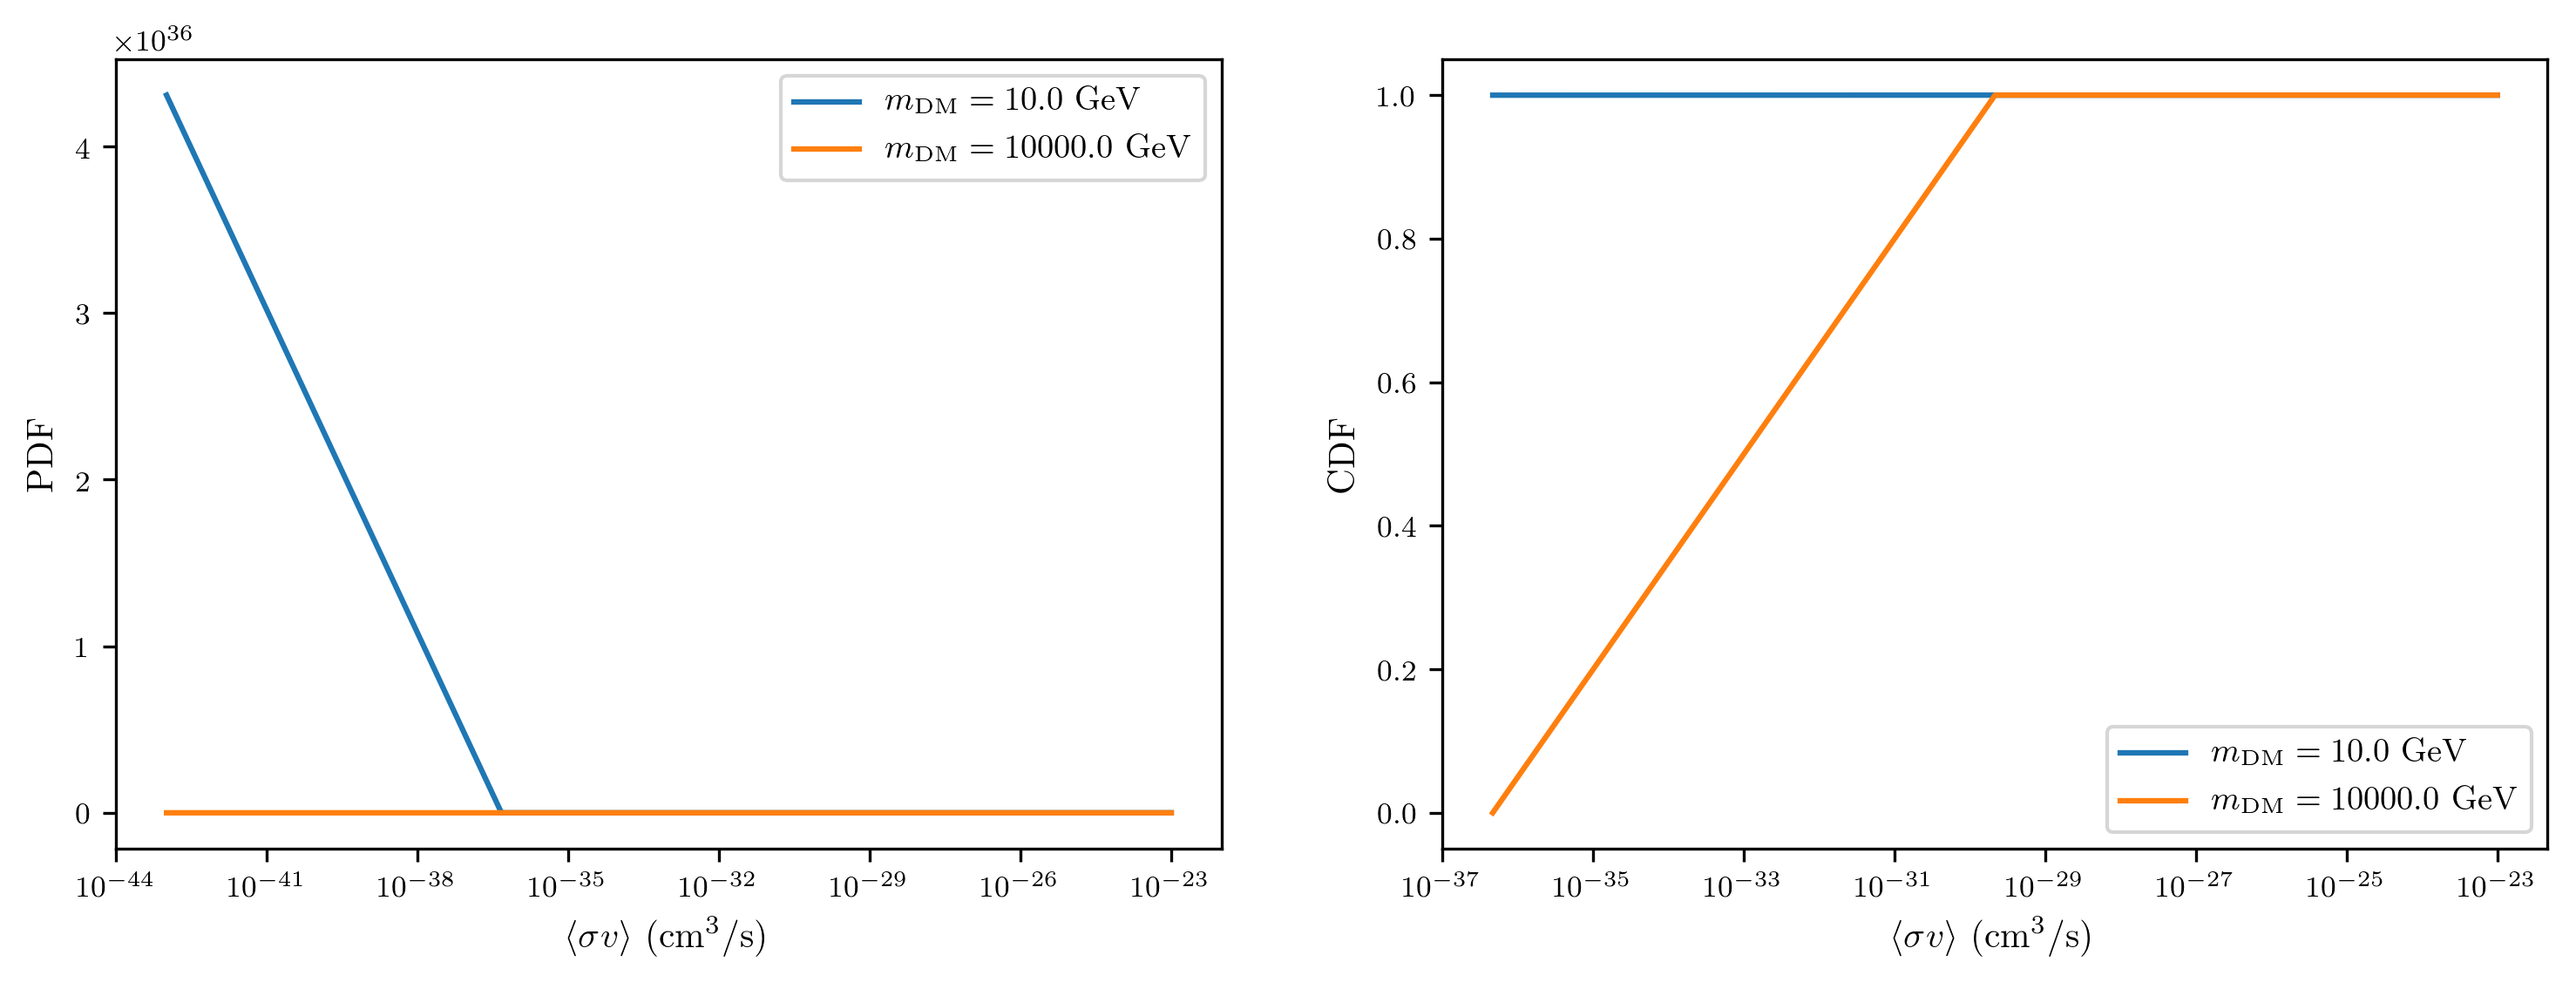

In [23]:
### Sanity check

# Plot posterior(<sigma v>) and its CDF to make sure the <sigma v>
# grid isn't clipping anything
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
for i, m_dm in enumerate(m_dms):
    ax.plot(svs, post_vals[:, i],
            label=r"$m_{\mathrm{DM}} = %.1f$ GeV" % m_dm)
ax.set_ylabel("PDF")

ax = axes[1]
for i, m_dm in enumerate(m_dms):
    ax.plot(svs[1:], cumtrapz(post_vals[:, i], svs),
            label=r"$m_{\mathrm{DM}} = %.1f$ GeV" % m_dm)
ax.set_ylabel("CDF")

for ax in axes.flatten():
    ax.set_xscale("log")
    ax.set_xlabel(r"$\langle \sigma v \rangle$ (cm$^3$/s)")
    ax.legend()

(1e-45, 1e-25)

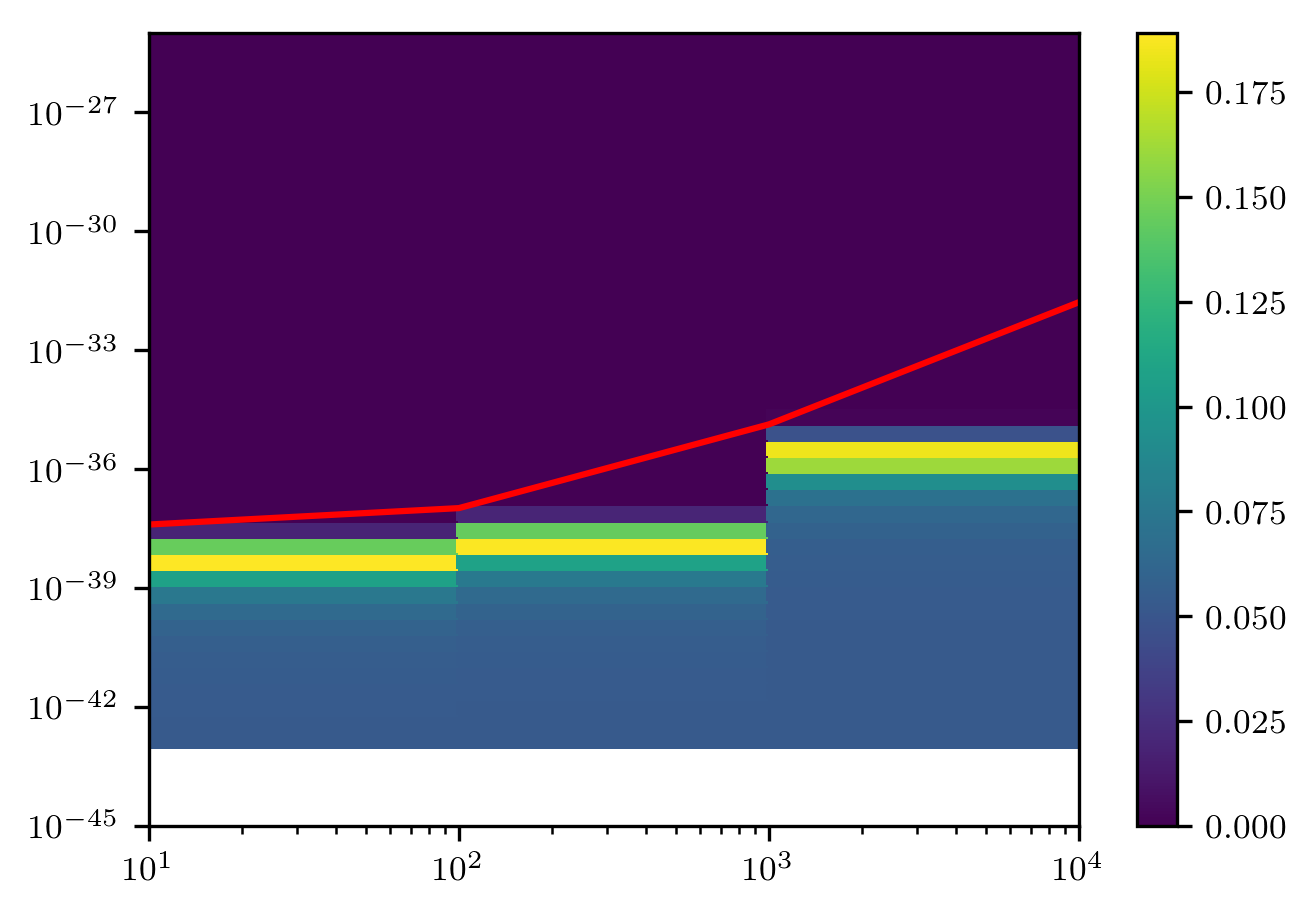

In [22]:
### Create the limit plot

# Load the unnormalized posterior table
svs, m_dms, un_post_vals = post_ps.load_posterior(normalized=False)

# Compute 95% upper limit on <sigma v>
m_dms, sv_bounds = post_ps.sv_bounds(save=False)
plt.plot(m_dms, sv_bounds, 'r')

# Plot unnormalized posterior values
m_dm_mg, sv_mg = np.meshgrid(m_dms, svs)
post_pcmesh = plt.pcolormesh(m_dm_mg, sv_mg, un_post_vals,
                             edgecolor="face")
plt.colorbar(post_pcmesh)

plt.xscale("log")
plt.yscale("log")
plt.xlim(m_dms[[0, -1]])
plt.ylim(svs[[0, -1]])

In [21]:
os.system('say "Done"')

0